In [1]:
import pandas as pd

df = pd.read_csv('E-commerce Customer analysis.csv')
df.head()


,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [3]:
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [6]:
df.describe(include='all')

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
count,3660,3660,3660,3660.000000,3660.000000,3660.000000,3660,3660
unique,3660,3660,7,NaN,NaN,NaN,5,326
top,e73ad07c,a5d07442-d,Home & Kitchen,NaN,NaN,NaN,Credit Card,21-08-2024
freq,1,1,549,NaN,NaN,NaN,760,21
mean,NaN,NaN,NaN,254.800675,18.825137,206.906579,NaN,NaN
std,NaN,NaN,NaN,141.682621,14.731338,122.687844,NaN,NaN
min,NaN,NaN,NaN,10.090000,0.000000,5.890000,NaN,NaN
25%,NaN,NaN,NaN,134.012500,5.000000,104.512500,NaN,NaN
50%,NaN,NaN,NaN,253.845000,15.000000,199.185000,NaN,NaN
75%,NaN,NaN,NaN,377.595000,25.000000,304.117500,NaN,NaN


In [7]:
df.isnull().sum()

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

In [11]:
df.columns


Index(['User_ID', 'Product_ID', 'Category', 'Price (Rs.)', 'Discount (%)',
       'Final_Price(Rs.)', 'Payment_Method', 'Purchase_Date'],
      dtype='object')

In [12]:
df.groupby('Category')['Final_Price(Rs.)'].mean()


Category
Beauty            206.366535
Books             208.144850
Clothing          217.165424
Electronics       201.731386
Home & Kitchen    200.961894
Sports            208.689981
Toys              205.142811
Name: Final_Price(Rs.), dtype: float64

In [13]:
df.groupby('Category')['Final_Price(Rs.)'].sum()


Category
Beauty            104215.10
Books             111149.35
Clothing          115314.84
Electronics       100462.23
Home & Kitchen    110328.08
Sports            108518.79
Toys              107289.69
Name: Final_Price(Rs.), dtype: float64

In [16]:
df['Payment_Method'].value_counts()


Payment_Method
Credit Card         760
UPI                 757
Debit Card          731
Net Banking         716
Cash on Delivery    696
Name: count, dtype: int64

In [19]:
list(df.columns)


['User_ID',
 'Product_ID',
 'Category',
 'Price (Rs.)',
 'Discount (%)',
 'Final_Price(Rs.)',
 'Payment_Method',
 'Purchase_Date']

In [22]:
df['User_ID'].value_counts().head()


User_ID
e73ad07c    1
337c166f    1
d38a19bf    1
d7f5f0b0    1
395d4994    1
Name: count, dtype: int64

In [24]:
df.columns=df.columns.str.lower()

In [25]:
df.columns

Index(['user_id', 'product_id', 'category', 'price (rs.)', 'discount (%)',
       'final_price(rs.)', 'payment_method', 'purchase_date'],
      dtype='object')

<Axes: xlabel='payment_method'>

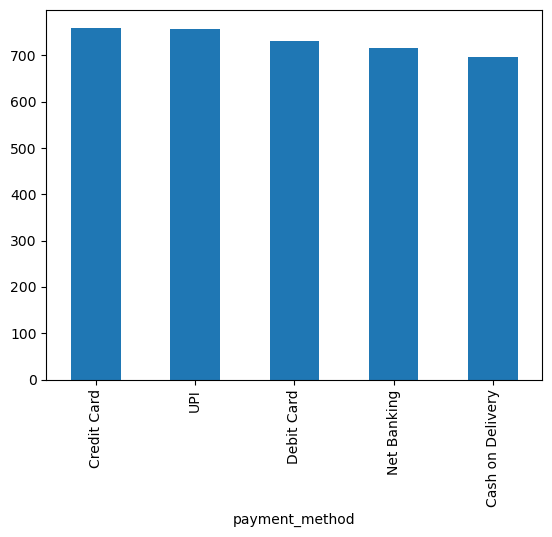

In [27]:
df['payment_method'].value_counts().plot(kind='bar')


In [33]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'], dayfirst=True)


In [35]:
df['purchase_date'].head()


0   2024-11-12
1   2024-02-09
2   2024-09-01
3   2024-04-01
4   2024-09-27
Name: purchase_date, dtype: datetime64[ns]

In [36]:
df['purchase_date'].dt.day_name().value_counts()


purchase_date
Sunday       566
Tuesday      542
Thursday     525
Monday       522
Friday       519
Wednesday    509
Saturday     477
Name: count, dtype: int64

In [41]:
df.groupby(df['purchase_date'].dt.month)['final_price(rs.)'].sum()


purchase_date
1     69009.43
2     69186.34
3     71325.40
4     74365.13
5     68837.25
6     64256.66
7     72798.23
8     71506.96
9     68043.09
10    76034.51
11    51915.08
Name: final_price(rs.), dtype: float64

In [42]:
df['purchase_date'].dt.dayofweek.apply(lambda x: 'Weekend' if x>=5 else 'Weekday').value_counts()


purchase_date
Weekday    2617
Weekend    1043
Name: count, dtype: int64

In [43]:
df['discount (%)'].mean()


np.float64(18.825136612021858)

In [44]:
df['discount (%)'].min(), df['discount (%)'].max()


(0, 50)

In [45]:
df.groupby('category')['discount (%)'].mean().sort_values(ascending=False)


category
Home & Kitchen    19.608379
Sports            19.326923
Electronics       19.267068
Books             19.035581
Beauty            18.475248
Toys              18.126195
Clothing          17.919021
Name: discount (%), dtype: float64

In [46]:
df.groupby('discount (%)')['final_price(rs.)'].mean().head()


discount (%)
0     255.216250
5     247.438830
10    228.317632
15    220.293565
20    199.863898
Name: final_price(rs.), dtype: float64

In [1]:
pip install sqlalchemy psycopg2-binary


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 968.7 kB/s eta 0:00:03
   ----------- ---------------------------- 0.8/2.7 MB 892.6 kB/s eta 0:00:03
   ----------- ---------------------------- 0.8/2.7 MB 892.6 kB/s eta 0:00:03
   --------------- ------------------------ 1.0/2.7 MB 846.3 kB/s eta 0:00:02
   ------------------- -------------------- 1.3/2.7 MB 876.2 kB/s eta 0:00:02
   ----------------------- ---------------- 1.6/2.7 MB 955.9 kB/s eta 0:00:02
   --------------------------- ------------ 1.8/2.7 MB 1.0 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.7 MB 1.1 MB/s eta 0:00:01
   -----------------------

In [2]:
pip install psycopg2-binary sqlalchemy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd

df = pd.read_csv("E-commerce Customer analysis.csv")


In [45]:
import pandas as pd
from sqlalchemy import create_engine

username = "postgres"
password = "root"
host = "localhost"
port = "5432"
database = "e_commerce_analysis"

engine = create_engine(
    f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
)

table_name = "e_commerce"
df.to_sql(table_name,engine,if_exists="replace",index=False)

print(f"Data successfully loaded into table'{table_name}'in database'{database}'.")


Data successfully loaded into table'e_commerce'in database'e_commerce_analysis'.
